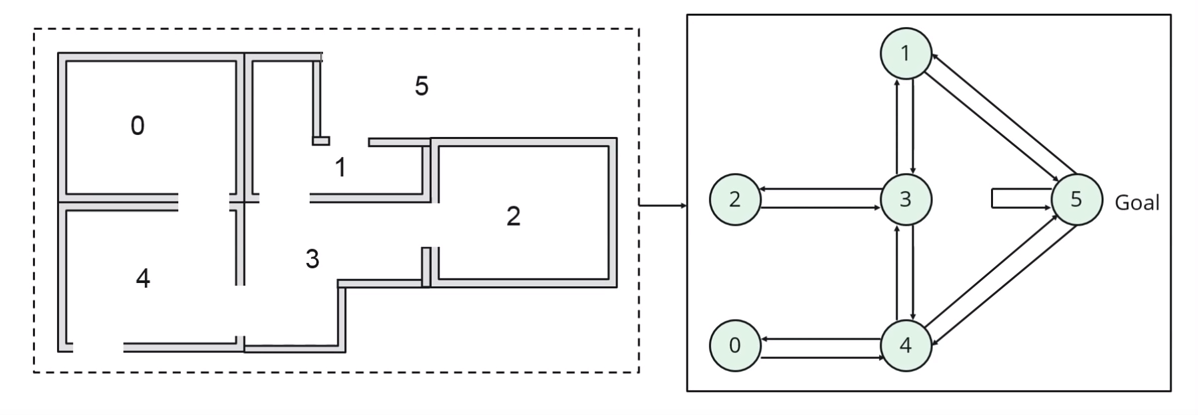

In [1]:
import numpy as np

#R matrix

the below mentioned maxtrix is reward matrix in which reward are mentioned. Here -1 represnt no value or null value.

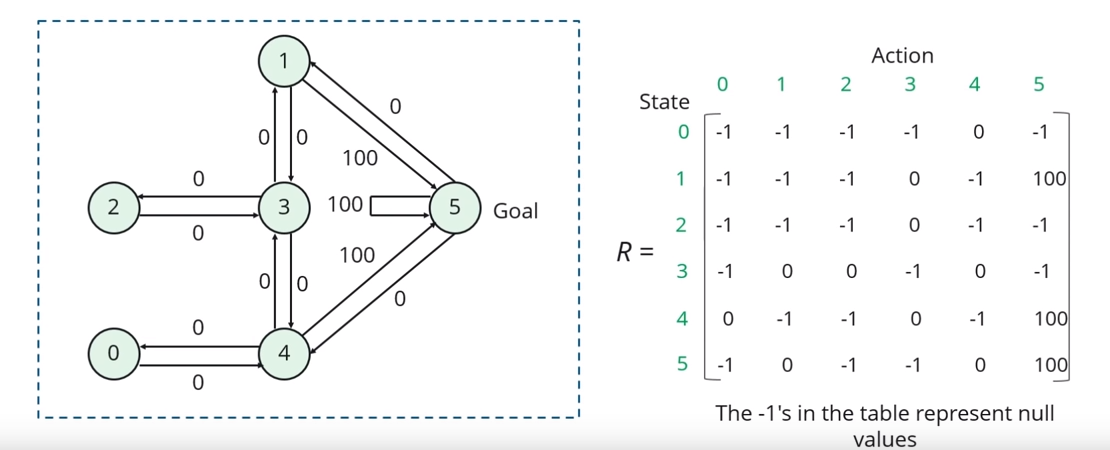

In [2]:


R = np.matrix([[-1,-1,-1,-1,0,-1],
              [-1,-1,-1,0,1,100],
              [-1,-1,-1,0,-1,-1],
              [-1,0,0,-1,0,-1],
              [-1,0,0,-1,-1,100],
              [-1,0,-1,-1,0,100]])

q matrix
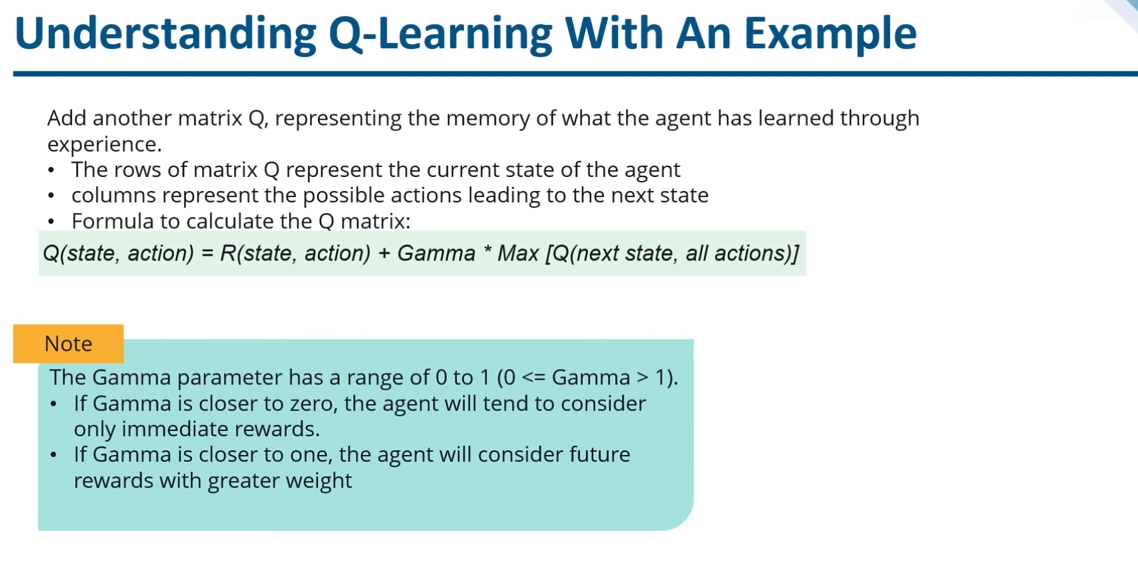

In [3]:
q = np.matrix(np.zeros([6,6]))

gamma parameter( learning parameter)

In [4]:
gamma = 0.2



intial state usually choosen at random

In [5]:
intial_state = 1

availablle actions in the given state which is given as an argument

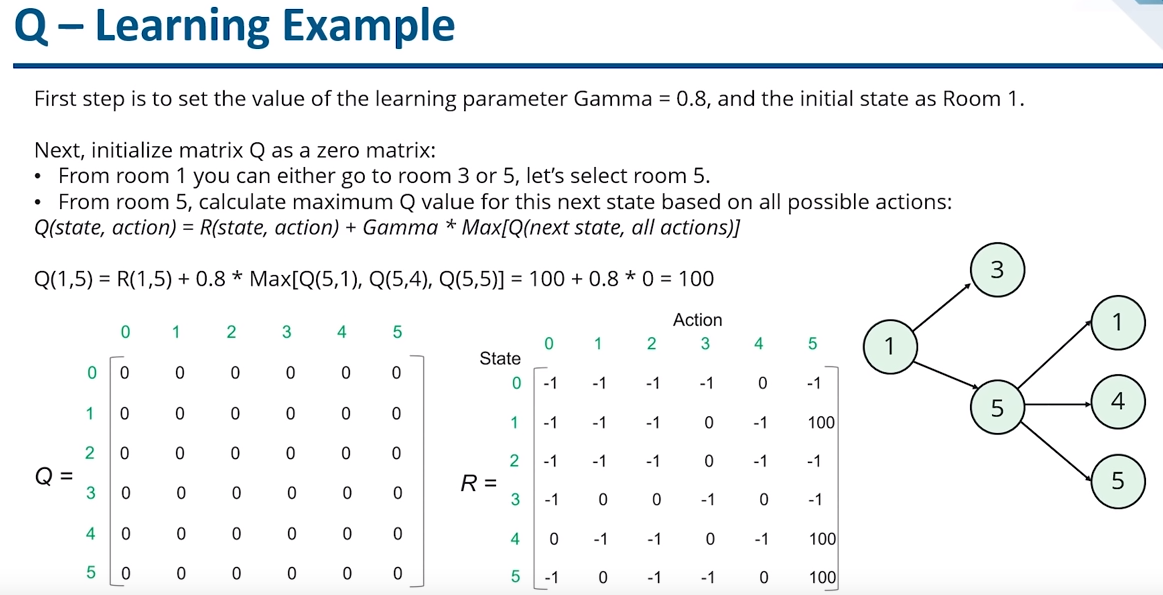

In [6]:
def available_actions(state):
    current_state_row = R[state]
    av_act = np.where(current_state_row>=0)[1]
    return av_act

get available actions in the given state

In [7]:
available_act = available_actions(intial_state)

this function chooses randommly which action to be performed that available in available act

In [8]:
def sample_next_action(available_action_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

sample next action to be performed

In [9]:
action = sample_next_action(available_act)

this function update the q matrix according to the path selected and the q learning algo

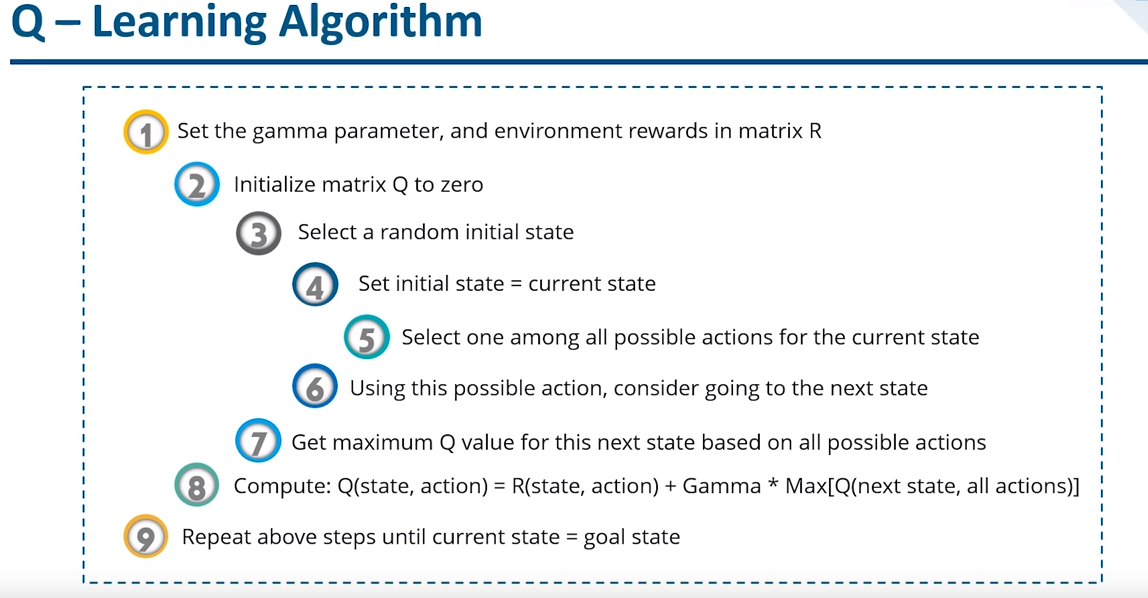

In [10]:
def update(current_state,action,gamma):
    max_index = np.where(q[action,]==np.max(q[action,]))[1]
    if max_index.shape[0]>1:
        max_index = int(np.random.choice(max_index,size=1))
    else:
        max_index = int(max_index)
    max_value = q[action,max_index]
    
    # q learning formula 
    q[current_state,action] = R[current_state,action]+ gamma*max_value
    

In [11]:
#update q matrix 
update(intial_state,action,gamma)

training

In [12]:
for i in range(10000):
    current_state = np.random.randint(0,int(q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    update(current_state,action,gamma)

normalize the trained q matrix

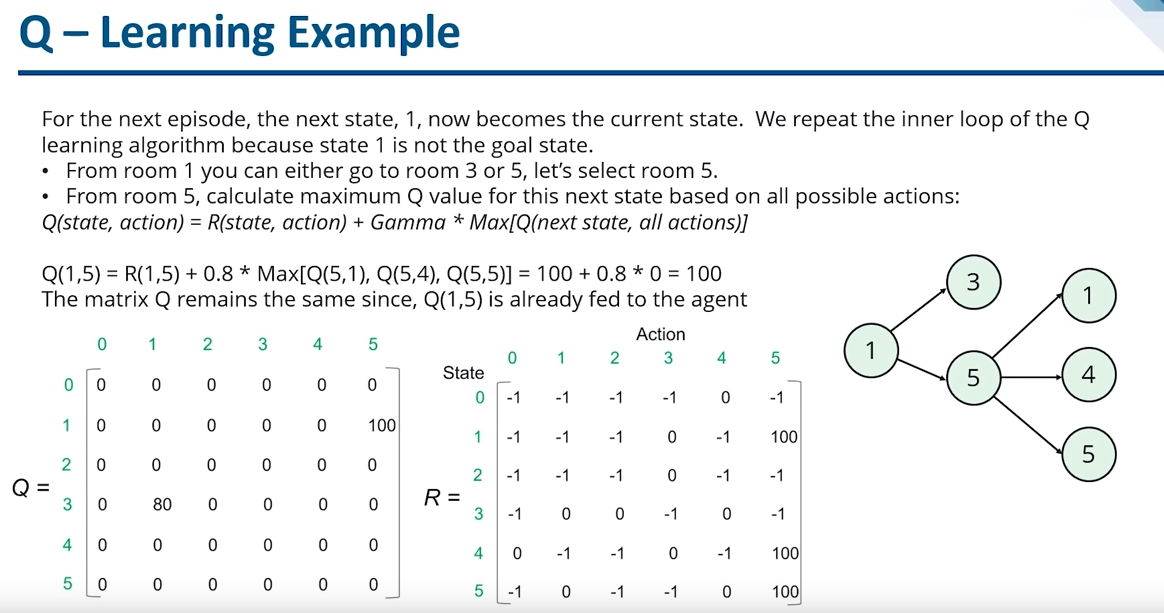

In [13]:
print(" trained q matrix")
print(q/np.max(q)*100)

 trained q matrix
[[  0.    0.    0.    0.   20.    0. ]
 [  0.    0.    0.    4.   20.8 100. ]
 [  0.    0.    0.    4.    0.    0. ]
 [  0.   20.    0.8   0.   20.    0. ]
 [  0.   20.    0.8   0.    0.  100. ]
 [  0.   20.    0.    0.   20.  100. ]]


testing

In [14]:
#goal state is 5

current_state = 1
steps = [current_state]
while current_state!=5:
    next_step_index =  np.where(q[current_state,]==np.max(q[current_state,]))[1]
    if next_step_index[0]>1:
        next_step_index = int(np.random.choice(next_step_index,size=1))
    else:
        next_step_index = int(next_step_index)
    steps.append(next_step_index)
    current_state = next_step_index
print("selected path")
print(steps)

selected path
[1, 5]
